Copyright by Arjun Sarkar Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge https://www.leibniz-hki.de/en/applied-systems-biology.html HKI-Center for Systems Biology of Infection Leibniz Institute for Natural Product Research and Infection Biology - Hans Knöll Insitute (HKI) Adolf-Reichwein-Straße 23, 07745 Jena, Germany

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import math
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
import datetime

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5"

strategy = tf.distribute.MirroredStrategy(["GPU:0","GPU:1","GPU:2","GPU:3","GPU:4","GPU:5"])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5')


In [3]:
df = pd.read_csv('Label_Training.csv')
df.head()

,video_num,image,infection,patient,class_label,image_path
0,1,246.tif,ca,1,0,/asbdata/Arjun/Bloodi/TIFF8/1/246.tif
1,1,094.tif,ca,1,0,/asbdata/Arjun/Bloodi/TIFF8/1/094.tif
2,1,158.tif,ca,1,0,/asbdata/Arjun/Bloodi/TIFF8/1/158.tif
3,1,062.tif,ca,1,0,/asbdata/Arjun/Bloodi/TIFF8/1/062.tif
4,1,174.tif,ca,1,0,/asbdata/Arjun/Bloodi/TIFF8/1/174.tif


In [4]:
image_size = 512
batch_size = 16

target_names = ["$\it{C. albicans}$","$\it{C. glabrata}$","Mock"]

def find_preds(array):
    
    list_preds = []
    preds = []
    
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
        
            preds = np.append(preds,array[i,j])
        
        preds = np.array(preds)
        
        unique, occ = np.unique(preds, return_counts=True)
        preds = []
        id_occ = np.argmax(occ)
        final_pred = unique[id_occ]
    
        list_preds = np.append(list_preds,final_pred)
        list_preds = np.array(list_preds)
        list_preds = list_preds.astype(int)
        
    return list_preds

def original_func(test):

    orig_labels_all = np.array(test['class_label'])
    orig_labels = np.reshape(orig_labels_all, (-1,260))
    original_labels = find_preds(orig_labels)

    return original_labels, orig_labels_all

def predicted_func(model, test_generator):
    
    with strategy.scope():
        predicted_all = model.predict(test_generator, steps = len(test_generator)).argmax(axis=1)
        
    predicted_labels = np.reshape(predicted_all, (-1,260))
    predicted_labels = find_preds(predicted_labels)
    
    return predicted_labels, predicted_all

def orig_preds(df):
    
    with strategy.scope():

        test= df[df['patient']==1]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_1, original_label_all_1 = original_func(test)
        predicted_label_1, predicted_label_all_1 = predicted_func(final_model_1, test_generator)
    
        test= df[df['patient']==2]
    
        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')
    
        original_label_2, original_label_all_2 = original_func(test)
        predicted_label_2, predicted_label_all_2 = predicted_func(final_model_2, test_generator)

        test= df[df['patient']==5]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_3, original_label_all_3 = original_func(test)
        predicted_label_3, predicted_label_all_3 = predicted_func(final_model_3, test_generator)

        test= df[df['patient']==7]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_4, original_label_all_4 = original_func(test)
        predicted_label_4, predicted_label_all_4 = predicted_func(final_model_4, test_generator)

        test= df[df['patient']==8]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_5, original_label_all_5 = original_func(test)
        predicted_label_5, predicted_label_all_5 = predicted_func(final_model_5, test_generator)

        test= df[df['patient']==9]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_6, original_label_all_6 = original_func(test)
        predicted_label_6, predicted_label_all_6 = predicted_func(final_model_6, test_generator)

        test= df[df['patient']==10]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_7, original_label_all_7 = original_func(test)
        predicted_label_7, predicted_label_all_7 = predicted_func(final_model_7, test_generator)

        test= df[df['patient']==11]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_8, original_label_all_8 = original_func(test)
        predicted_label_8, predicted_label_all_8 = predicted_func(final_model_8, test_generator)

        test= df[df['patient']==12]

        test_generator= get_test_and_valid_generator(test, 'image_path','class_label')

        original_label_9, original_label_all_9 = original_func(test)
        predicted_label_9, predicted_label_all_9 = predicted_func(final_model_9, test_generator)


        orig_labels = []

        for i in donors:
            orig_labels.extend(eval('original_label_'+str(i)))
    
        orig = np.array(orig_labels)

        pred_labels = []

        for i in donors:
            pred_labels.extend(eval('predicted_label_'+str(i)))
    
        pred = np.array(pred_labels)
        
    return orig,pred

In [5]:
with strategy.scope():

    final_model_1 = tf.keras.models.load_model('efficient_fullimage_test_1.h5')
    final_model_2 = tf.keras.models.load_model('efficient_fullimage_test_2.h5')
    final_model_3 = tf.keras.models.load_model('efficient_fullimage_test_3.h5')
    final_model_4 = tf.keras.models.load_model('efficient_fullimage_test_4.h5')
    final_model_5 = tf.keras.models.load_model('efficient_fullimage_test_5.h5')
    final_model_6 = tf.keras.models.load_model('efficient_fullimage_test_6.h5')
    final_model_7 = tf.keras.models.load_model('efficient_fullimage_test_7.h5')
    final_model_8 = tf.keras.models.load_model('efficient_fullimage_test_8.h5')
    final_model_9 = tf.keras.models.load_model('efficient_fullimage_test_9.h5')

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [6]:
from tensorflow.keras.applications.efficientnet import EfficientNetB5, preprocess_input

donors = [1,2,3,4,5,6,7,8,9]

def get_test_and_valid_generator(test_df, x_col, y_cols, batch_size=batch_size, seed=1, image_size=image_size):

    image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            target_size = (image_size,image_size),
            shuffle=False,
            seed=seed)
    
    return test_generator

orig_efficient,pred_efficient = orig_preds(df)
print(orig_efficient)
print(pred_efficient)

Found 780 validated image filenames.
49/49 [==============================] - 93s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 94s 2s/step
Found 780 validated image filenames.
49/49 [==============================] - 93s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 93s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 88s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 90s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 86s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 92s 1s/step
Found 780 validated image filenames.
49/49 [==============================] - 89s 1s/step
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
[0 1 2 2 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 1 1 2 0 1 2]


In [7]:
with strategy.scope():

    final_model_1 = tf.keras.models.load_model('inception_fullimage_test_1.h5')
    final_model_2 = tf.keras.models.load_model('inception_fullimage_test_2.h5')
    final_model_3 = tf.keras.models.load_model('inception_fullimage_test_3.h5')
    final_model_4 = tf.keras.models.load_model('inception_fullimage_test_4.h5')
    final_model_5 = tf.keras.models.load_model('inception_fullimage_test_5.h5')
    final_model_6 = tf.keras.models.load_model('inception_fullimage_test_6.h5')
    final_model_7 = tf.keras.models.load_model('inception_fullimage_test_7.h5')
    final_model_8 = tf.keras.models.load_model('inception_fullimage_test_8.h5')
    final_model_9 = tf.keras.models.load_model('inception_fullimage_test_9.h5')

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

donors = [1,2,3,4,5,6,7,8,9]

def get_test_and_valid_generator(test_df, x_col, y_cols, batch_size=batch_size, seed=1, image_size=image_size):

    image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            target_size = (image_size,image_size),
            shuffle=False,
            seed=seed)
    
    return test_generator

orig_inception,pred_inception = orig_preds(df)
print(orig_inception)
print(pred_inception)

Found 780 validated image filenames.
49/49 [==============================] - 53s 619ms/step
Found 780 validated image filenames.
49/49 [==============================] - 43s 667ms/step
Found 780 validated image filenames.
49/49 [==============================] - 42s 649ms/step
Found 780 validated image filenames.
49/49 [==============================] - 39s 610ms/step
Found 780 validated image filenames.
49/49 [==============================] - 40s 615ms/step
Found 780 validated image filenames.
49/49 [==============================] - 38s 596ms/step
Found 780 validated image filenames.
49/49 [==============================] - 38s 580ms/step
Found 780 validated image filenames.
49/49 [==============================] - 40s 591ms/step
Found 780 validated image filenames.
49/49 [==============================] - 38s 588ms/step
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
[0 1 0 0 1 2 1 1 2 0 1 2 0 1 2 0 1 0 0 1 2 1 1 2 0 1 2]


In [9]:
with strategy.scope():

    final_model_1 = tf.keras.models.load_model('resnet_fullimage_test_1.h5')
    final_model_2 = tf.keras.models.load_model('resnet_fullimage_test_2.h5')
    final_model_3 = tf.keras.models.load_model('resnet_fullimage_test_3.h5')
    final_model_4 = tf.keras.models.load_model('resnet_fullimage_test_4.h5')
    final_model_5 = tf.keras.models.load_model('resnet_fullimage_test_5.h5')
    final_model_6 = tf.keras.models.load_model('resnet_fullimage_test_6.h5')
    final_model_7 = tf.keras.models.load_model('resnet_fullimage_test_7.h5')
    final_model_8 = tf.keras.models.load_model('resnet_fullimage_test_8.h5')
    final_model_9 = tf.keras.models.load_model('resnet_fullimage_test_9.h5')

In [10]:
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input

donors = [1,2,3,4,5,6,7,8,9]

def get_test_and_valid_generator(test_df, x_col, y_cols, batch_size=batch_size, seed=1, image_size=image_size):

    image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            target_size = (image_size,image_size),
            shuffle=False,
            seed=seed)
    
    return test_generator

orig_resnet,pred_resnet = orig_preds(df)
print(orig_resnet)
print(pred_resnet)

Found 780 validated image filenames.
49/49 [==============================] - 40s 629ms/step
Found 780 validated image filenames.
49/49 [==============================] - 41s 678ms/step
Found 780 validated image filenames.
49/49 [==============================] - 44s 680ms/step
Found 780 validated image filenames.
49/49 [==============================] - 39s 647ms/step
Found 780 validated image filenames.
49/49 [==============================] - 39s 643ms/step
Found 780 validated image filenames.
49/49 [==============================] - 37s 614ms/step
Found 780 validated image filenames.
49/49 [==============================] - 38s 607ms/step
Found 780 validated image filenames.
49/49 [==============================] - 38s 616ms/step
Found 780 validated image filenames.
49/49 [==============================] - 37s 606ms/step
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
[0 1 2 2 1 2 1 1 2 0 0 2 0 1 2 1 1 0 0 0 2 1 1 2 0 1 2]


In [11]:
with strategy.scope():

    final_model_1 = tf.keras.models.load_model('xception_fullimage_test_1.h5')
    final_model_2 = tf.keras.models.load_model('xception_fullimage_test_2.h5')
    final_model_3 = tf.keras.models.load_model('xception_fullimage_test_3.h5')
    final_model_4 = tf.keras.models.load_model('xception_fullimage_test_4.h5')
    final_model_5 = tf.keras.models.load_model('xception_fullimage_test_5.h5')
    final_model_6 = tf.keras.models.load_model('xception_fullimage_test_6.h5')
    final_model_7 = tf.keras.models.load_model('xception_fullimage_test_7.h5')
    final_model_8 = tf.keras.models.load_model('xception_fullimage_test_8.h5')
    final_model_9 = tf.keras.models.load_model('xception_fullimage_test_9.h5')

In [12]:
from tensorflow.keras.applications.xception import Xception, preprocess_input

donors = [1,2,3,4,5,6,7,8,9]

def get_test_and_valid_generator(test_df, x_col, y_cols, batch_size=batch_size, seed=1, image_size=image_size):

    image_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            target_size = (image_size,image_size),
            shuffle=False,
            seed=seed)
    
    return test_generator

orig_xception,pred_xception = orig_preds(df)
print(orig_xception)
print(pred_xception)

Found 780 validated image filenames.
49/49 [==============================] - 36s 595ms/step
Found 780 validated image filenames.
49/49 [==============================] - 41s 633ms/step
Found 780 validated image filenames.
49/49 [==============================] - 37s 625ms/step
Found 780 validated image filenames.
49/49 [==============================] - 36s 601ms/step
Found 780 validated image filenames.
49/49 [==============================] - 36s 607ms/step
Found 780 validated image filenames.
49/49 [==============================] - 36s 603ms/step
Found 780 validated image filenames.
49/49 [==============================] - 34s 580ms/step
Found 780 validated image filenames.
49/49 [==============================] - 36s 611ms/step
Found 780 validated image filenames.
49/49 [==============================] - 36s 611ms/step
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
[0 1 0 2 1 2 1 1 2 0 1 2 0 1 2 1 1 2 0 1 2 1 1 2 0 1 2]


In [13]:
from sklearn.metrics import classification_report

# Calculate accuracy, precision, recall, and F1-score
print("\nClassification Report Resnet50:")
print(classification_report(orig_resnet, pred_resnet))

print("\nClassification Report InceptionV3:")
print(classification_report(orig_inception, pred_inception))

print("\nClassification Report Xception:")
print(classification_report(orig_xception, pred_xception))

print("\nClassification Report EfficientNetB5:")
print(classification_report(orig_efficient, pred_efficient))


Classification Report Resnet50:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.70      0.78      0.74         9
           2       0.89      0.89      0.89         9

    accuracy                           0.74        27
   macro avg       0.74      0.74      0.74        27
weighted avg       0.74      0.74      0.74        27


Classification Report InceptionV3:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.82      1.00      0.90         9
           2       1.00      0.78      0.88         9

    accuracy                           0.85        27
   macro avg       0.87      0.85      0.85        27
weighted avg       0.87      0.85      0.85        27


Classification Report Xception:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.75    

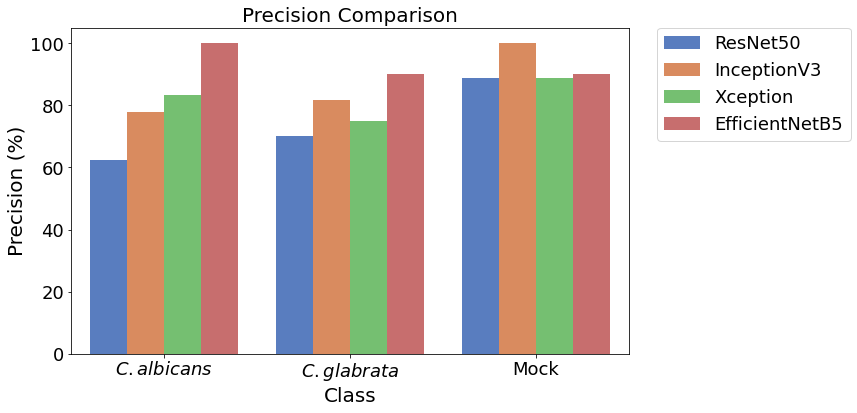

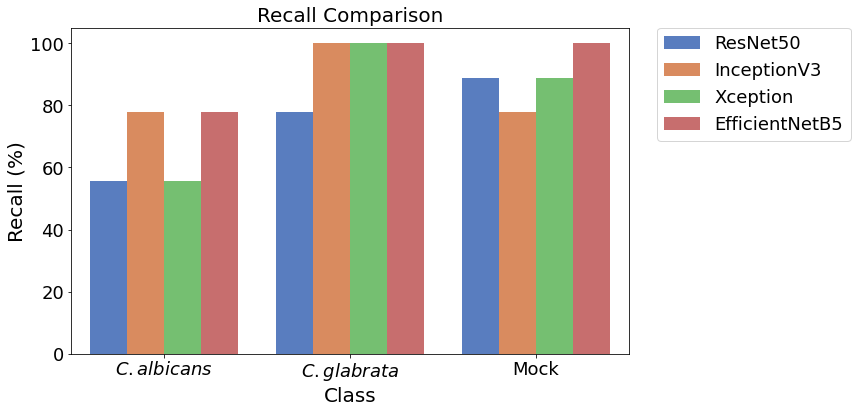

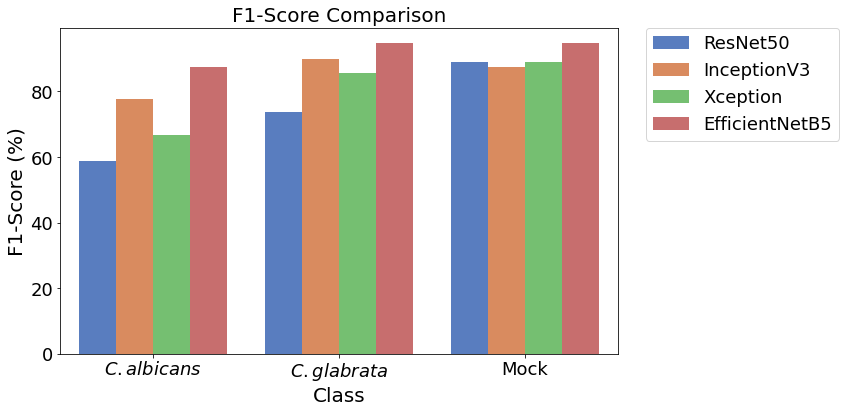

In [22]:
classification_reports = []
report = classification_report(orig_resnet, pred_resnet, output_dict=True)
classification_reports.append(report)
report = classification_report(orig_inception, pred_inception, output_dict=True)
classification_reports.append(report)
report = classification_report(orig_xception, pred_xception, output_dict=True)
classification_reports.append(report)
report = classification_report(orig_efficient, pred_efficient, output_dict=True)
classification_reports.append(report)

model_names = ['ResNet50','InceptionV3','Xception','EfficientNetB5']


# Create a function to plot the classification report comparing models
def plot_classification_report_comparison(classification_reports, model_names):
    metrics = ['Precision', 'Recall', 'F1-Score']
    data = []

    for report, model_name in zip(classification_reports, model_names):
        classes = list(report.keys())[:-3]  # Remove 'accuracy', 'macro avg', and 'weighted avg'
        precision = [report[key]['precision'] for key in classes]
        recall = [report[key]['recall'] for key in classes]
        f1_score = [report[key]['f1-score'] for key in classes]

        for i, c in enumerate(classes):
            data.append({'Model': model_name, 'Class': c, 'Precision': precision[i]*100, 'Recall': recall[i]*100, 'F1-Score': f1_score[i]*100})

    df = pd.DataFrame(data)
    df['Class'] = df['Class'].replace({'0': '$\it{C. albicans}$', '1': '$\it{C. glabrata}$', '2': 'Mock'})

    # Using a built-in muted color palette
    sns.set_palette('muted')

    # Plot using Seaborn
    for i, metric in enumerate(metrics):
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x='Class', y=metric, hue='Model', data=df, ax=ax)
        ax.set_title(f'{metric} Comparison', fontsize=20)
        ax.set_ylabel(f'{metric} (%)', fontsize=20)
        ax.set_xlabel('Class', fontsize=20)
        
        # Set tick label size
        ax.tick_params(axis='x', labelsize=18)  # Set x-axis tick label size
        ax.tick_params(axis='y', labelsize=18)  # Set y-axis tick label size

        # Move the legend to the right of the graph
        ax.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        
        # Save the plot as a PNG image with 300 dpi
        plt.savefig(f'{metric}_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

# Call the function to plot the classification report comparison
plot_classification_report_comparison(classification_reports, model_names)